In [153]:
import pandas as pd
import numpy
from matplotlib import pyplot
from math import log10
import numpy as np

In [154]:
data = pd.read_csv('data/gender_predictions/all_clean_gender_predictions.csv')

In [155]:
data.head()

,Last_Name,First_Name,Remuneration,Expenses,Year,Sex_at_birth,Accuracy
0,Aamodt,Tor,193153,5597.0,2023,Male,1.00
1,Abanto,Arleni,107723,393.0,2023,Female,1.00
2,Abbassi,Arash,109136,82.0,2023,Male,1.00
3,Abdalkhani,Arman,101829,NaN,2023,Male,1.00
4,Abdi,Ali,238203,2981.0,2023,NaN,0.76


In [156]:
data_summary = data[["Remuneration","Expenses"]].apply(
    {
        "Remuneration":["mean","median","min","max"],
        "Expenses":["mean","median","min","max"]
    }
).map(lambda x: round(x, 2))

max_expenses = data_summary.loc['max','Expenses']
min_expenses = data_summary.loc['min','Expenses']
max_remuneration = data_summary.loc['max','Remuneration']
min_remuneration = data_summary.loc['min','Remuneration']


In [157]:
data[data['Expenses'] == 149971]

,Last_Name,First_Name,Remuneration,Expenses,Year,Sex_at_birth,Accuracy
22436,Helsley,Robert,528884,149971.0,2020,Male,1.0


In [158]:
log_data = data.copy()
# adding number to avoid negative value error
log_data['Remuneration'] = data['Remuneration'].apply(log10).apply(log10)
log_data['Expenses'] = data['Expenses'].apply(lambda x: log10(x + 3745))

In [159]:
log_data_summary = log_data[["Remuneration","Expenses"]].apply(
    {
        "Remuneration":["mean","median","min","max"],
        "Expenses":["mean","median","min","max"]
    }
).map(lambda x: round(x, 2))

max_log_expenses = log_data_summary.loc['max','Expenses']
min_log_expenses = log_data_summary.loc['min','Expenses']
max_log_remuneration = log_data_summary.loc['max','Remuneration']
min_log_remuneration = log_data_summary.loc['min','Remuneration']

log_data_summary

,Remuneration,Expenses
mean,0.71,3.79
median,0.70,3.71
min,0.69,0.00
max,0.78,5.19


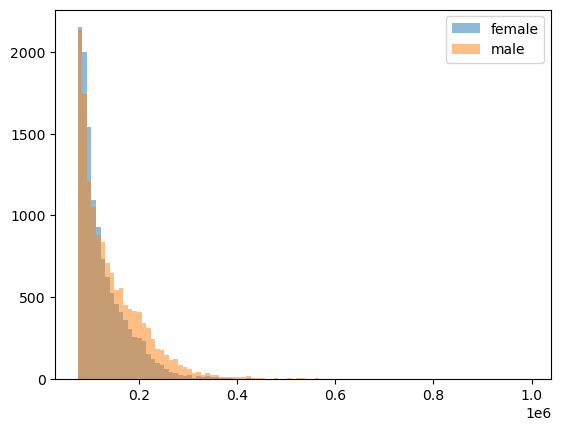

In [160]:
# plot of salary data un-transformed
bins = numpy.linspace(min_remuneration, max_remuneration, 100)

female_salary = data[data['Sex_at_birth'] == "Female"]['Remuneration']
male_salary = data[data['Sex_at_birth'] == "Male"]['Remuneration']

pyplot.hist(female_salary, bins, alpha=0.5, label='female')
pyplot.hist(male_salary, bins, alpha=0.5, label='male')
pyplot.legend(loc='upper right')
pyplot.show()

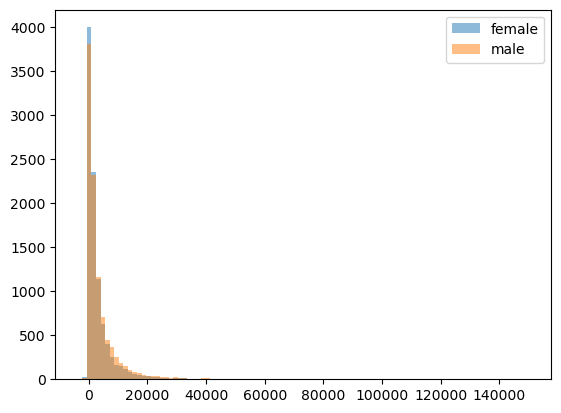

In [161]:
# plot of expenses data un-transformed
bins = numpy.linspace(min_expenses, max_expenses, 100)

female_expenses = data[data['Sex_at_birth'] == "Female"]['Expenses']
male_expenses= data[data['Sex_at_birth'] == "Male"]['Expenses']

pyplot.hist(female_expenses, bins, alpha=0.5, label='female')
pyplot.hist(male_expenses, bins, alpha=0.5, label='male')
pyplot.legend(loc='upper right')
pyplot.show()

In [162]:
# box plot of log expenses data
import plotly.express as px
fig = px.box(data, x="Remuneration", y="Sex_at_birth")
fig.show()

In [163]:
# box plot of log expenses data
import plotly.express as px
fig = px.box(data, x="Expenses", y="Sex_at_birth")
fig.show()

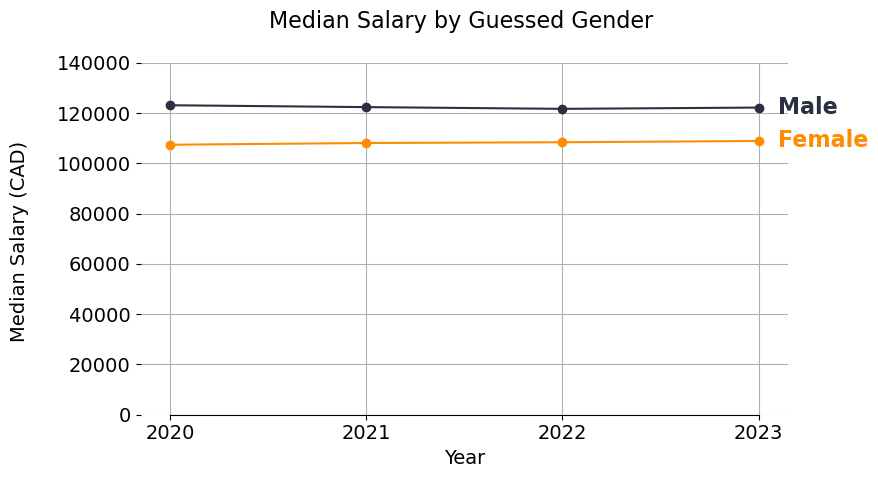

In [256]:
# plot median salary over the years

import matplotlib.pyplot as plt

# plot over the years
median_salary = data.groupby(['Year', 'Sex_at_birth'])['Remuneration'].median().unstack()

fig, ax = plt.subplots(figsize=(9, 5))


# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", family="sans-serif")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_DEFAULT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot median salary for males
ax.plot(median_salary.index, median_salary['Male'], marker='o', label='Male', color="#2B2F42")

ax.text(max(data["Year"]) + 0.1,
        median_salary['Male'].tolist()[-1],
        'Male',
        color="#2B2F42",
        fontsize = 16,
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )

# Plot median salary for females
ax.plot(median_salary.index, median_salary['Female'], marker='o', label='Female', color="#FF8C00")

ax.text(max(data["Year"]) + 0.1,
        median_salary['Female'].tolist()[-1],
        'Female',
        fontsize = 16,
        color="#FF8C00",
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )

plt.title('Median Salary by Guessed Gender \n')
plt.xlabel('Year')
plt.ylabel('Median Salary (CAD) \n')

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(2020, max(data["Year"]))

plt.ylim(0, 140000)
plt.grid(True)
plt.xticks(median_salary.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

In [202]:
# median salary over the years by gender


2023

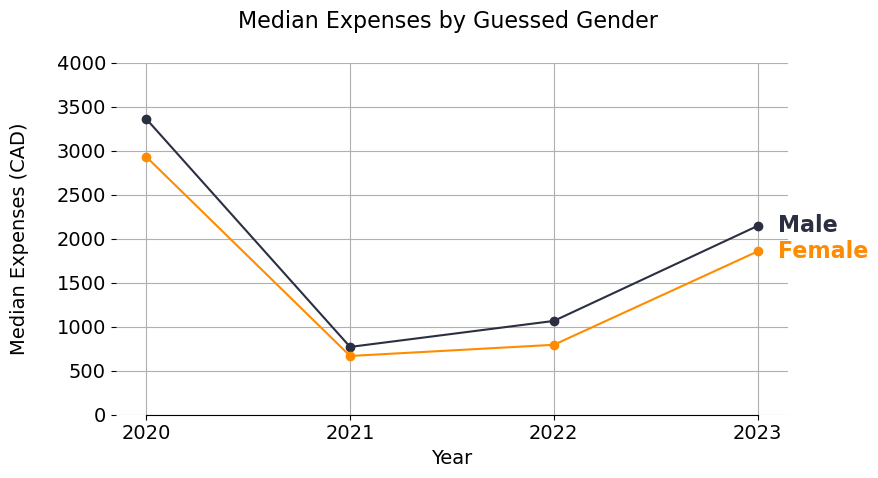

In [257]:
# plot median salary over the years
# plot median salary over the years

import matplotlib.pyplot as plt

# plot over the years
median_salary = data.groupby(['Year', 'Sex_at_birth'])['Expenses'].median().unstack()

fig, ax = plt.subplots(figsize=(9, 5))


# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", family="sans-serif")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_DEFAULT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot median salary for males
ax.plot(median_salary.index, median_salary['Male'], marker='o', label='Male', color="#2B2F42")

ax.text(max(data["Year"]) + 0.1,
        median_salary['Male'].tolist()[-1],
        'Male',
        color="#2B2F42",
        fontsize = 16,
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )

# Plot median salary for females
ax.plot(median_salary.index, median_salary['Female'], marker='o', label='Female', color="#FF8C00")

ax.text(max(data["Year"]) + 0.1,
        median_salary['Female'].tolist()[-1],
        'Female',
        fontsize = 16,
        color="#FF8C00",
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )

plt.title('Median Expenses by Guessed Gender \n')
plt.xlabel('Year')
plt.ylabel('Median Expenses (CAD)\n')

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(2020, max(data["Year"]))

plt.ylim(0, 4000)
plt.grid(True)
plt.xticks(median_salary.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

In [276]:
median_expenses
data.head()

,Last_Name,First_Name,Remuneration,Expenses,Year,Sex_at_birth,Accuracy
0,Aamodt,Tor,193153,5597.0,2023,Male,1.00
1,Abanto,Arleni,107723,393.0,2023,Female,1.00
2,Abbassi,Arash,109136,82.0,2023,Male,1.00
3,Abdalkhani,Arman,101829,NaN,2023,Male,1.00
4,Abdi,Ali,238203,2981.0,2023,NaN,0.76


In [277]:
data[data["Year"] == 2023].shape

(7816, 7)

In [279]:
no_dups = data[data["Year"] == 2023].drop_duplicates(subset = ['First_Name','Last_Name'])
no_dups.shape

(7768, 7)

In [282]:
# looking at percentaage salary raises/decreases

# Drop names that appear in the male and female datasets - since cannot determine the difference between the two
sub_data = data.drop_duplicates(subset=['First_Name','Last_Name','Year'], keep = False)


# Merge DataFrame with itself
merged_df = sub_data.merge(sub_data, how='inner', on=['First_Name', 'Last_Name'])

# Filter rows where years are consecutive
merged_df = merged_df[merged_df['Year_y'] == merged_df['Year_x'] + 1]

# Calculate salary change
merged_df['salary_change_amount'] = merged_df['Remuneration_y'] - merged_df['Remuneration_x']

merged_df['salary_change_percent'] = round(100*(merged_df['Remuneration_y'] - merged_df['Remuneration_x'])/merged_df['Remuneration_x'],2)

merged_df['transition_year'] = merged_df['Year_y']

# Select columns of interest
result_df = merged_df[['First_Name', 'Last_Name', 'Sex_at_birth_x','transition_year', 'salary_change_amount','salary_change_percent']].rename(columns = {'Sex_at_birth_x':'Sex_at_birth'})
result_df


,First_Name,Last_Name,Sex_at_birth,transition_year,salary_change_amount,salary_change_percent
22678,Tor,Aamodt,Male,2023,-28738,-12.95
22682,Arleni,Abanto,Female,2023,7109,7.07
22686,Arash,Abbassi,Male,2023,1847,1.72
22690,Arman,Abdalkhani,Male,2023,26510,35.20
22697,Ali,Abdi,NaN,2023,-3763,-1.56
...,...,...,...,...,...,...
94402,Yinshan,Zhao,Male,2021,7408,7.36
94407,Fei,Zhou,NaN,2021,11879,6.50
94412,Youwen,Zhou,Male,2021,9842,6.19
94418,Bingshuang,Zou,Male,2021,6865,3.67


In [291]:

# plot salary changes over the years
median_salary_change = result_df.groupby(['transition_year', 'Sex_at_birth'])['salary_change_percent'].median().unstack()
median_salary_change

Sex_at_birth,Female,Male
transition_year,,
2021,6.99,5.44
2022,3.86,3.37
2023,3.09,2.70


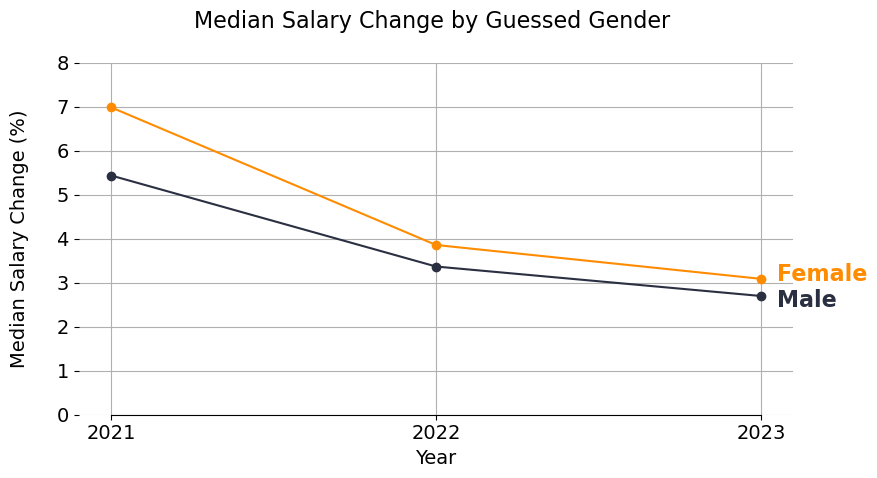

In [310]:
# plot median salary over the years
# plot median salary over the years

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5))


# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", family="sans-serif")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_DEFAULT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot median salary for males
ax.plot(median_salary_change.index, median_salary_change['Male'], marker='o', label='Male', color="#2B2F42")

ax.text(max(data["Year"] + 0.05),
        median_salary_change['Male'].tolist()[-1] - 0.1,
        'Male',
        color="#2B2F42",
        fontsize = 16,
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )

# Plot median salary for females
ax.plot(median_salary_change.index, median_salary_change['Female'], marker='o', label='Female', color="#FF8C00")

ax.text(max(data["Year"]) + 0.05,
        median_salary_change['Female'].tolist()[-1] +0.1,
        'Female',
        fontsize = 16,
        color="#FF8C00",
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )

plt.title('Median Salary Change by Guessed Gender \n')
plt.xlabel('Year')
plt.ylabel('Median Salary Change (%)\n')

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(2021, max(data["Year"]))

plt.ylim(0, 8)
plt.grid(True)
plt.xticks(median_salary_change.index)  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

transition_year
2021    5.44
2022    3.37
2023    2.70
Name: Male, dtype: float64